In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/bladder1.csv")


In [ ]:
df.dtypes


,0
Unnamed: 0,int64
id,int64
treatment,object
number,int64
size,int64
recur,int64
start,int64
stop,int64
status,int64
rtumor,object


In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=903a771b3c272fb0e246433df655e76754485da9007bc07ae15831e6125129a8
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [ ]:
#display all unique values for each column of df
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Unnamed: 0: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [ ]:
df.nunique

<bound method DataFrame.nunique of      Unnamed: 0   id treatment  number  size  recur  start  stop  status  \
0             1    1   placebo       1     1      0      0     0       3   
1             2    2   placebo       1     3      0      0     1       3   
2             3    3   placebo       2     1      0      0     4       0   
3             4    4   placebo       1     1      0      0     7       0   
4             5    5   placebo       5     1      0      0    10       3   
..          ...  ...       ...     ...   ...    ...    ...   ...     ...   
289         290  115  thiotepa       4     1      3     47    50       0   
290         291  116  thiotepa       3     4      0      0    54       0   
291         292  117  thiotepa       2     1      1      0    38       1   
292         293  117  thiotepa       2     1      1     38    54       0   
293         294  118  thiotepa       1     3      0      0    59       3   

     rtumor  rsize  enum tumor_category  
0         0    0.0     1        1 Tumor  
1         0    0.0     1        1 Tumor  
2         0    0.0     1       2 Tumors  
3         0    0.0     1        1 Tumor  
4         0    0.0     1       5 Tumors  
..      ...    ...   ...            ...  
289       0    0.0     4       4 Tumors  
290       0    0.0     1       3 Tumors  
291       2    1.0     1       2 Tumors  
292       0    0.0     2       2 Tumors  
293       0    0.0     1        1 Tumor  

[294 rows x 13 columns]>

In [ ]:
# Load dataset


# Replace missing or invalid values in 'rtumor' with 0
df['rtumor'] = pd.to_numeric(df['rtumor'], errors='coerce').fillna(0).astype(int)

# Tumor category mapping
def tumor_category_mapping(num):
    if num == 0: return "Zero Tumors"
    elif num == 1: return "1 Tumor"
    elif num == 2: return "2 Tumors"
    elif num == 3: return "3 Tumors"
    elif num == 4: return "4 Tumors"
    elif num == 5: return "5 Tumors"
    elif num >= 6: return "6+ Tumors"
    return "Other"

df['tumor_category'] = df['number'].apply(tumor_category_mapping)


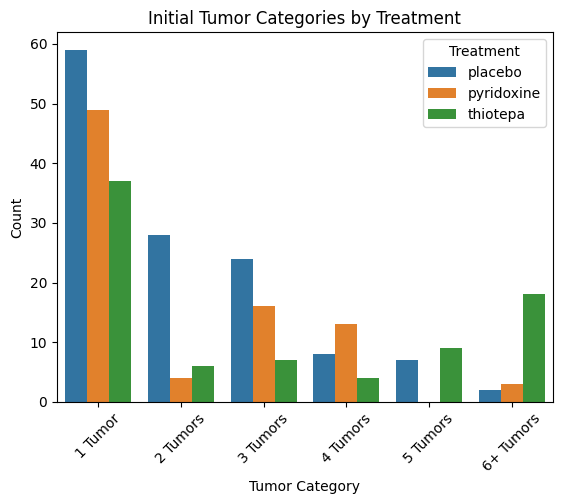

In [ ]:
# Group by treatment and tumor count
initial_treatment = df.groupby(['treatment', 'tumor_category']).size().reset_index(name='count')

# Visualization
sns.barplot(data=initial_treatment, x='tumor_category', y='count', hue='treatment', ci=None)
plt.title("Initial Tumor Categories by Treatment")
plt.xlabel("Tumor Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Treatment")
plt.show()


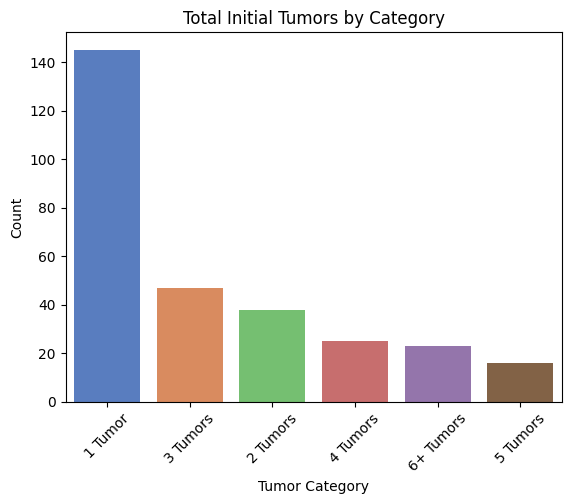

In [ ]:
# Group by tumor count
total_initial_tumors = df['tumor_category'].value_counts().reset_index()
total_initial_tumors.columns = ['tumor_category', 'count']

# Bar plot
sns.barplot(data=total_initial_tumors, x='tumor_category', y='count', palette="muted")
plt.title("Total Initial Tumors by Category")
plt.xlabel("Tumor Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


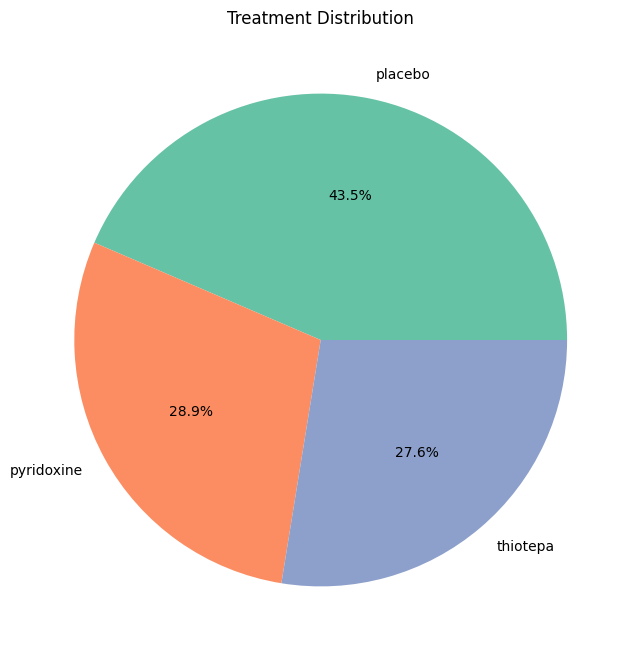

In [ ]:
# Treatment distribution
treatment_distribution = df['treatment'].value_counts(normalize=True) * 100

# Pie chart
treatment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2"), figsize=(8, 8))
plt.title("Treatment Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()


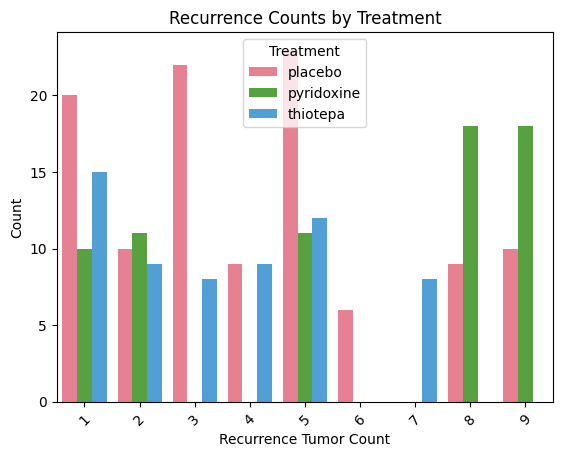

In [ ]:
# Filter recurrence cases
recurrence_data = df[df['recur'] > 0].groupby(['treatment', 'recur']).size().reset_index(name='count')

# Bar plot
sns.barplot(data=recurrence_data, x='recur', y='count', hue='treatment', ci=None, palette="husl")
plt.title("Recurrence Counts by Treatment")
plt.xlabel("Recurrence Tumor Count")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Treatment")
plt.show()


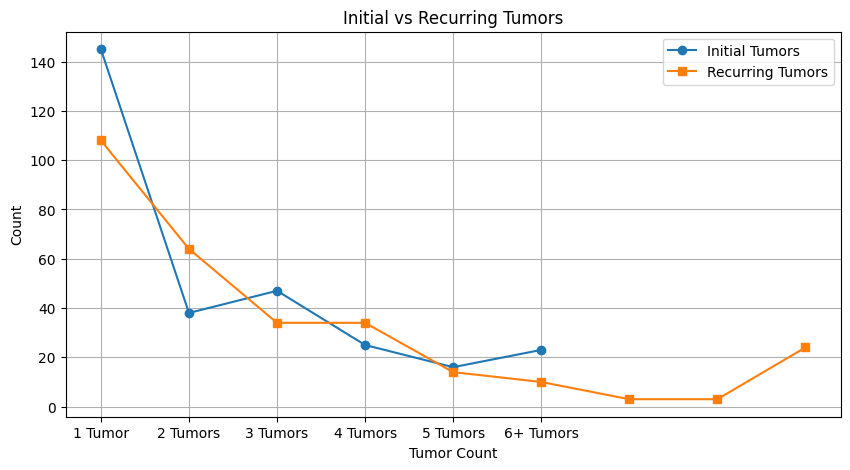

In [ ]:
# Aggregate initial and recurring tumors
initial_tumors = df.groupby('tumor_category').size().reset_index(name='initial_count')
recurring_tumors = df.groupby('rtumor').size().reset_index(name='recurring_count')

# Line plot comparison
plt.figure(figsize=(10, 5))
plt.plot(initial_tumors['tumor_category'], initial_tumors['initial_count'], label='Initial Tumors', marker='o')
plt.plot(recurring_tumors['rtumor'], recurring_tumors['recurring_count'], label='Recurring Tumors', marker='s')
plt.title("Initial vs Recurring Tumors")
plt.xlabel("Tumor Count")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


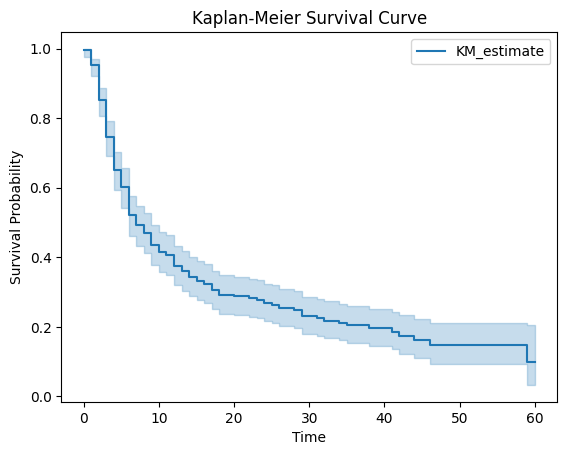

In [ ]:
from lifelines import KaplanMeierFitter

# Prepare survival data
kmf = KaplanMeierFitter()
kmf.fit(durations=df['stop'] - df['start'], event_observed=df['status'])

# Plot survival curve
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


dynamic programming

RF

In [ ]:
# Load necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'].replace('.', 0, inplace=True)
df['rtumor'].replace('.', 0, inplace=True)

# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions
model_size = RandomForestRegressor(random_state=42)
model_number = RandomForestRegressor(random_state=42)

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Model evaluation metrics for predictive accuracy
y_size_pred = model_size.predict(X_test)
y_number_pred = model_number.predict(X_test)

print(f"Tumor Size Prediction - MSE: {mean_squared_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - MAE: {mean_absolute_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - R2 Score: {r2_score(y_size_test, y_size_pred):.2f}\n")

print(f"Tumor Count Prediction - MSE: {mean_squared_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - MAE: {mean_absolute_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - R2 Score: {r2_score(y_number_test, y_number_pred):.2f}")

# Define all possible treatments for consistent feature encoding
all_treatments = ['treatment_placebo', 'treatment_pyridoxine', 'treatment_thiotepa']

# Function to predict treatment effects using the trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if t not in input_data.columns:
            input_data[t] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)

# Simulation function using the predictive model for each patient
def simulate_treatment(df, num_iterations=100):
    all_episode_logs = []
    actual_sizes, predicted_sizes = [], []
    actual_counts, predicted_counts = [], []
    overall_metrics = {'total_reward': 0, 'total_size_reduction': 0, 'total_tumor_reduction': 0, 'num_recurrences': 0}

    for i, patient in df.iterrows():
        # Initialize patient states
        number_of_tumors = patient['number']
        tumor_size = patient['size']
        start_time = patient['start']
        stop_time = patient['stop']
        recurrence = patient['recur']

        total_reward = 0

        # Run treatment simulation over multiple episodes
        for iteration in range(1, num_iterations + 1):
            # Predict the effects of the chosen treatment
            predicted_size, predicted_number = predict_treatment_effect(
                treatment=patient['treatment'],
                number_of_tumors=number_of_tumors,
                tumor_size=tumor_size,
                recurrence=recurrence,
                start=start_time,
                stop=stop_time
            )

            # Store actual and predicted values for cumulative metrics calculation
            actual_sizes.append(tumor_size)
            predicted_sizes.append(predicted_size)
            actual_counts.append(number_of_tumors)
            predicted_counts.append(predicted_number)

            # Calculate the change in size and number of tumors
            tumor_size_change = tumor_size - predicted_size
            tumor_count_change = number_of_tumors - predicted_number

            # Update tumor size and count for the next iteration
            tumor_size = predicted_size
            number_of_tumors = predicted_number

            # Reward calculation based on domain knowledge
            if tumor_size_change > 0:
                reward = 10  # Reward for size reduction
            elif tumor_size_change < 0:
                reward = -10  # Penalty for size increase
            else:
                reward = 0  # No reward if no change

            if tumor_count_change > 0:
                reward += 10  # Additional reward for tumor count reduction
            elif tumor_count_change < 0:
                reward -= 10  # Additional penalty for tumor count increase

            # Special cases for events based on recurrence
            if recurrence == 1:  # Tumor recurrence event
                reward -= 10
            elif recurrence == 2:  # Death from bladder disease
                reward -= 100
            elif recurrence == 3:  # Death from other causes
                reward -= 5

            total_reward += reward

            # Log episode details
            all_episode_logs.append({
                'Patient ID': patient['id'],
                'Iteration': iteration,
                'Treatment': patient['treatment'],
                'Actual Tumor Size': tumor_size,
                'Predicted Tumor Size': predicted_size,
                'Actual Tumor Count': number_of_tumors,
                'Predicted Tumor Count': predicted_number,
                'Size Change': tumor_size_change,
                'Count Change': tumor_count_change,
                'Reward': reward
            })

        # Update overall metrics
        overall_metrics['total_reward'] += total_reward
        overall_metrics['total_size_reduction'] += tumor_size
        overall_metrics['total_tumor_reduction'] += number_of_tumors

    # Calculate cumulative metrics for tumor size
    cumulative_mse_size = mean_squared_error(actual_sizes, predicted_sizes)
    cumulative_mae_size = mean_absolute_error(actual_sizes, predicted_sizes)
    cumulative_r2_size = r2_score(actual_sizes, predicted_sizes)

    # Calculate cumulative metrics for tumor count
    cumulative_mse_count = mean_squared_error(actual_counts, predicted_counts)
    cumulative_mae_count = mean_absolute_error(actual_counts, predicted_counts)
    cumulative_r2_count = r2_score(actual_counts, predicted_counts)

    cumulative_metrics = {
        'Tumor Size Prediction - MSE': cumulative_mse_size,
        'Tumor Size Prediction - MAE': cumulative_mae_size,
        'Tumor Size Prediction - R2 Score': cumulative_r2_size,
        'Tumor Count Prediction - MSE': cumulative_mse_count,
        'Tumor Count Prediction - MAE': cumulative_mae_count,
        'Tumor Count Prediction - R2 Score': cumulative_r2_count
    }

    return pd.DataFrame(all_episode_logs), overall_metrics, cumulative_metrics

# Run the simulation for 100 iterations
episode_logs_df, overall_metrics, cumulative_metrics = simulate_treatment(df, num_iterations=100)

# Display episode logs
print("\nEpisode Logs:")
print(episode_logs_df[['Patient ID', 'Iteration', 'Treatment', 'Actual Tumor Size', 'Predicted Tumor Size', 'Actual Tumor Count', 'Predicted Tumor Count', 'Size Change', 'Count Change', 'Reward']])

# Display overall summary
print("\nOverall Summary Metrics:")
print(f"Total Reward: {overall_metrics['total_reward']}")
print(f"Total Tumor Size Reduction: {overall_metrics['total_size_reduction']}")
print(f"Total Tumor Count Reduction: {overall_metrics['total_tumor_reduction']}")
print(f"Average Tumor Size Reduction per Patient: {overall_metrics['total_size_reduction'] / len(df):.2f}")
print(f"Average Tumor Count Reduction per Patient: {overall_metrics['total_tumor_reduction'] / len(df):.2f}")

# Display cumulative metrics
print("\nCumulative Model Performance Metrics:")
for metric, value in cumulative_metrics.items():
    print(f"{metric}: {value:.2f}")


Tumor Size Prediction - MSE: 0.75
Tumor Size Prediction - MAE: 0.47
Tumor Size Prediction - R2 Score: -0.25

Tumor Count Prediction - MSE: 5.06
Tumor Count Prediction - MAE: 1.66
Tumor Count Prediction - R2 Score: -0.42

Episode Logs:
       Patient ID  Iteration Treatment  Actual Tumor Size  \
0               1          1   placebo                0.0   
1               1          2   placebo                0.0   
2               1          3   placebo                0.0   
3               1          4   placebo                0.0   
4               1          5   placebo                0.0   
...           ...        ...       ...                ...   
29395         118         96  thiotepa                0.0   
29396         118         97  thiotepa                0.0   
29397         118         98  thiotepa                0.0   
29398         118         99  thiotepa                0.0   
29399         118        100  thiotepa                0.0   

       Predicted Tumor Size  Act

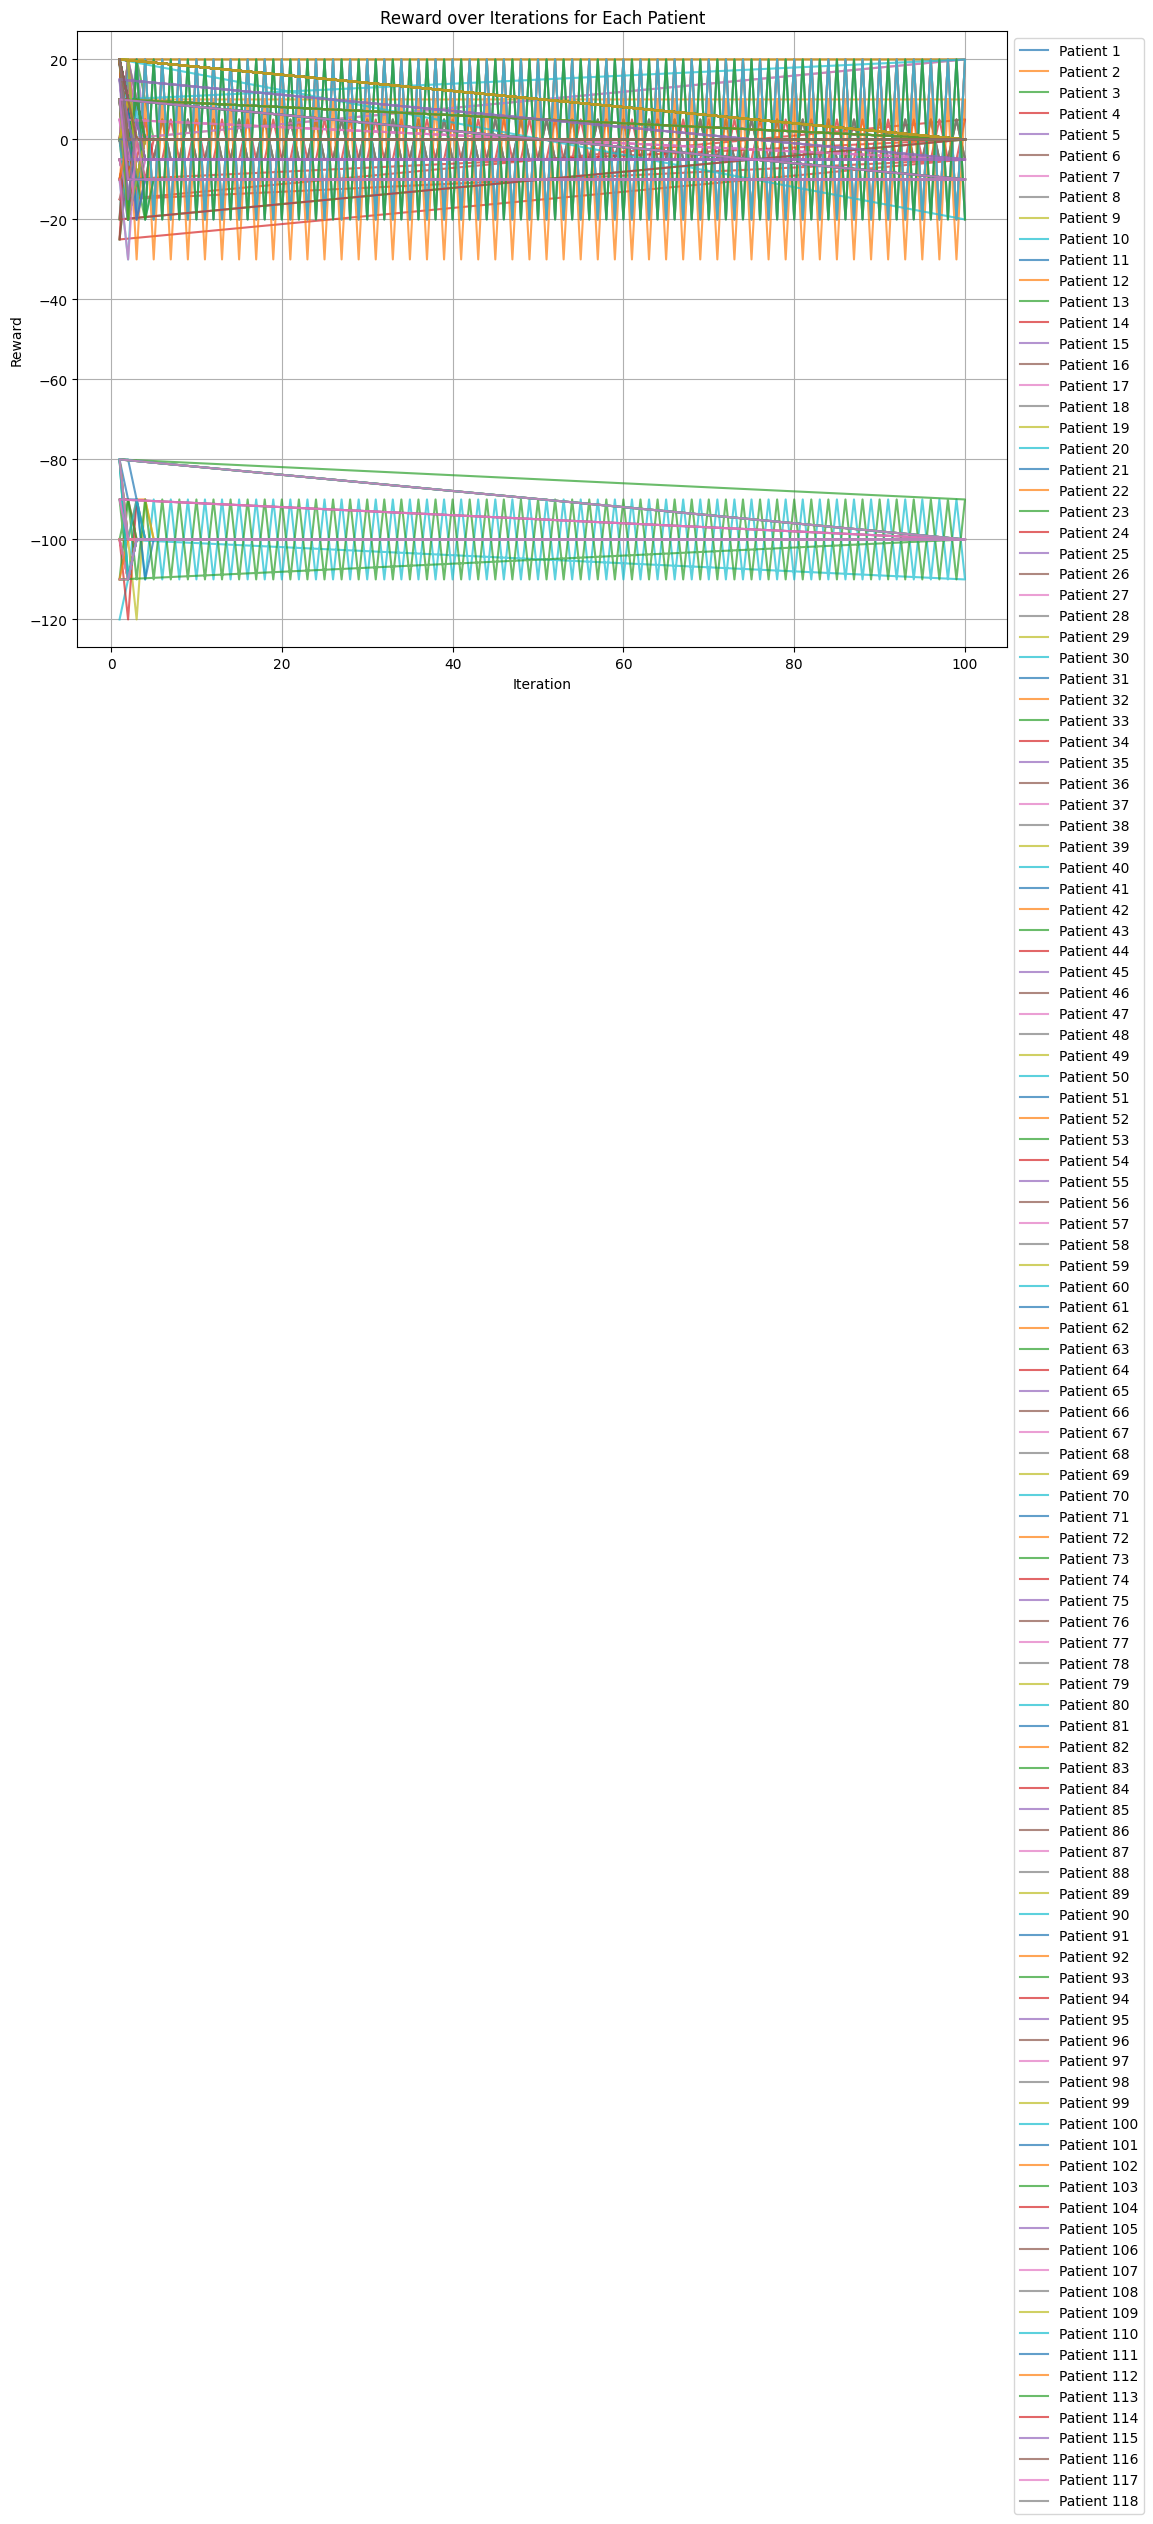

In [ ]:
import matplotlib.pyplot as plt

# Group by patient ID to plot rewards over iterations for each patient
plt.figure(figsize=(12, 8))
for patient_id, group in episode_logs_df.groupby('Patient ID'):
    plt.plot(group['Iteration'], group['Reward'], label=f'Patient {patient_id}', alpha=0.7)

# Plot formatting
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward over Iterations for Each Patient')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()


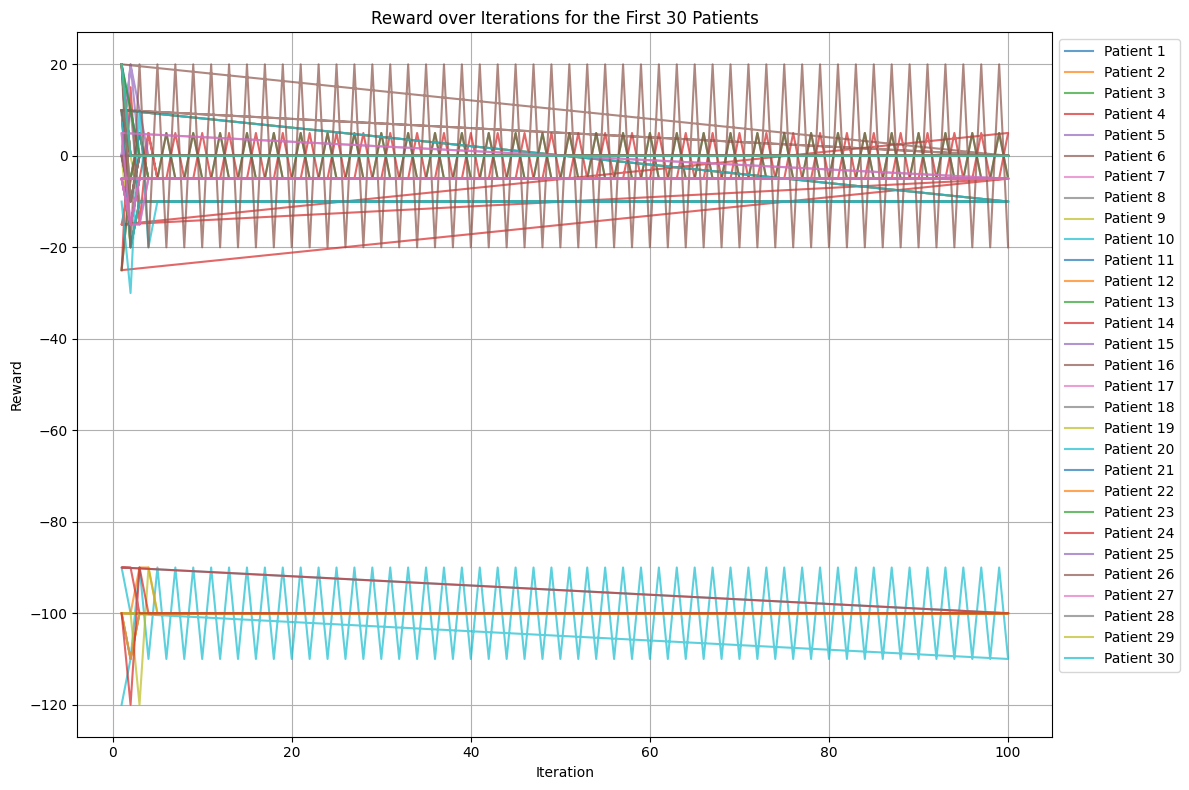

In [ ]:
import matplotlib.pyplot as plt

# Select the first 30 patients for plotting
selected_patients = episode_logs_df['Patient ID'].unique()[:30]

# Plot the reward for the first 30 patients
plt.figure(figsize=(12, 8))
for patient_id in selected_patients:
    group = episode_logs_df[episode_logs_df['Patient ID'] == patient_id]
    plt.plot(group['Iteration'], group['Reward'], label=f'Patient {patient_id}', alpha=0.7)

# Plot formatting
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward over Iterations for the First 30 Patients')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Remove legend to prevent it from being too long
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Uncomment if you want a legend

plt.show()


KNN

In [ ]:
# Load necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'].replace('.', 0, inplace=True)
df['rtumor'].replace('.', 0, inplace=True)

# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions using KNeighborsRegressor
model_size = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors as desired
model_number = KNeighborsRegressor(n_neighbors=5)

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Model evaluation metrics for predictive accuracy
y_size_pred = model_size.predict(X_test)
y_number_pred = model_number.predict(X_test)

print(f"Tumor Size Prediction - MSE: {mean_squared_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - MAE: {mean_absolute_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - R2 Score: {r2_score(y_size_test, y_size_pred):.2f}\n")

print(f"Tumor Count Prediction - MSE: {mean_squared_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - MAE: {mean_absolute_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - R2 Score: {r2_score(y_number_test, y_number_pred):.2f}")

# Define all possible treatments for consistent feature encoding
all_treatments = ['treatment_placebo', 'treatment_pyridoxine', 'treatment_thiotepa']

# Function to predict treatment effects using the trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if t not in input_data.columns:
            input_data[t] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)

# Simulation function using the predictive model for each patient
def simulate_treatment(df, num_iterations=100):
    all_episode_logs = []
    actual_sizes, predicted_sizes = [], []
    actual_counts, predicted_counts = [], []
    overall_metrics = {'total_reward': 0, 'total_size_reduction': 0, 'total_tumor_reduction': 0, 'num_recurrences': 0}

    for i, patient in df.iterrows():
        # Initialize patient states
        number_of_tumors = patient['number']
        tumor_size = patient['size']
        start_time = patient['start']
        stop_time = patient['stop']
        recurrence = patient['recur']

        total_reward = 0

        # Run treatment simulation over multiple episodes
        for iteration in range(1, num_iterations + 1):
            # Predict the effects of the chosen treatment
            predicted_size, predicted_number = predict_treatment_effect(
                treatment=patient['treatment'],
                number_of_tumors=number_of_tumors,
                tumor_size=tumor_size,
                recurrence=recurrence,
                start=start_time,
                stop=stop_time
            )

            # Store actual and predicted values for cumulative metrics calculation
            actual_sizes.append(tumor_size)
            predicted_sizes.append(predicted_size)
            actual_counts.append(number_of_tumors)
            predicted_counts.append(predicted_number)

            # Calculate the change in size and number of tumors
            tumor_size_change = tumor_size - predicted_size
            tumor_count_change = number_of_tumors - predicted_number

            # Update tumor size and count for the next iteration
            tumor_size = predicted_size
            number_of_tumors = predicted_number

            # Reward calculation based on domain knowledge
            if tumor_size_change > 0:
                reward = 10  # Reward for size reduction
            elif tumor_size_change < 0:
                reward = -10  # Penalty for size increase
            else:
                reward = 0  # No reward if no change

            if tumor_count_change > 0:
                reward += 10  # Additional reward for tumor count reduction
            elif tumor_count_change < 0:
                reward -= 10  # Additional penalty for tumor count increase

            # Special cases for events based on recurrence
            if recurrence == 1:  # Tumor recurrence event
                reward -= 10
            elif recurrence == 2:  # Death from bladder disease
                reward -= 100
            elif recurrence == 3:  # Death from other causes
                reward -= 5

            total_reward += reward

            # Log episode details
            all_episode_logs.append({
                'Patient ID': patient['id'],
                'Iteration': iteration,
                'Treatment': patient['treatment'],
                'Actual Tumor Size': tumor_size,
                'Predicted Tumor Size': predicted_size,
                'Actual Tumor Count': number_of_tumors,
                'Predicted Tumor Count': predicted_number,
                'Size Change': tumor_size_change,
                'Count Change': tumor_count_change,
                'Reward': reward
            })

        # Update overall metrics
        overall_metrics['total_reward'] += total_reward
        overall_metrics['total_size_reduction'] += tumor_size
        overall_metrics['total_tumor_reduction'] += number_of_tumors

    # Calculate cumulative metrics for tumor size
    cumulative_mse_size = mean_squared_error(actual_sizes, predicted_sizes)
    cumulative_mae_size = mean_absolute_error(actual_sizes, predicted_sizes)
    cumulative_r2_size = r2_score(actual_sizes, predicted_sizes)

    # Calculate cumulative metrics for tumor count
    cumulative_mse_count = mean_squared_error(actual_counts, predicted_counts)
    cumulative_mae_count = mean_absolute_error(actual_counts, predicted_counts)
    cumulative_r2_count = r2_score(actual_counts, predicted_counts)

    cumulative_metrics = {
        'Tumor Size Prediction - MSE': cumulative_mse_size,
        'Tumor Size Prediction - MAE': cumulative_mae_size,
        'Tumor Size Prediction - R2 Score': cumulative_r2_size,
        'Tumor Count Prediction - MSE': cumulative_mse_count,
        'Tumor Count Prediction - MAE': cumulative_mae_count,
        'Tumor Count Prediction - R2 Score': cumulative_r2_count
    }

    return pd.DataFrame(all_episode_logs), overall_metrics, cumulative_metrics

# Run the simulation for 100 iterations
episode_logs_df, overall_metrics, cumulative_metrics = simulate_treatment(df, num_iterations=100)

# Display episode logs
print("\nEpisode Logs:")
print(episode_logs_df[['Patient ID', 'Iteration', 'Treatment', 'Actual Tumor Size', 'Predicted Tumor Size', 'Actual Tumor Count', 'Predicted Tumor Count', 'Size Change', 'Count Change', 'Reward']])

# Display overall summary
print("\nOverall Summary Metrics:")
print(f"Total Reward: {overall_metrics['total_reward']}")
print(f"Total Tumor Size Reduction: {overall_metrics['total_size_reduction']}")
print(f"Total Tumor Count Reduction: {overall_metrics['total_tumor_reduction']}")
print(f"Average Tumor Size Reduction per Patient: {overall_metrics['total_size_reduction'] / len(df):.2f}")
print(f"Average Tumor Count Reduction per Patient: {overall_metrics['total_tumor_reduction'] / len(df):.2f}")

# Display cumulative metrics
print("\nCumulative Metrics:")
for key, value in cumulative_metrics.items():
    print(f"{key}: {value:.2f}")


Tumor Size Prediction - MSE: 0.62
Tumor Size Prediction - MAE: 0.49
Tumor Size Prediction - R2 Score: -0.03

Tumor Count Prediction - MSE: 5.02
Tumor Count Prediction - MAE: 1.72
Tumor Count Prediction - R2 Score: -0.41

Episode Logs:
       Patient ID  Iteration Treatment  Actual Tumor Size  \
0               1          1   placebo                0.4   
1               1          2   placebo                0.4   
2               1          3   placebo                0.4   
3               1          4   placebo                0.4   
4               1          5   placebo                0.4   
...           ...        ...       ...                ...   
29395         118         96  thiotepa                0.0   
29396         118         97  thiotepa                0.0   
29397         118         98  thiotepa                0.0   
29398         118         99  thiotepa                0.0   
29399         118        100  thiotepa                0.0   

       Predicted Tumor Size  Act

Linear Regression

In [ ]:
# Load necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'].replace('.', 0, inplace=True)
df['rtumor'].replace('.', 0, inplace=True)

# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions using LinearRegression
model_size = LinearRegression()
model_number = LinearRegression()

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Model evaluation metrics for predictive accuracy
y_size_pred = model_size.predict(X_test)
y_number_pred = model_number.predict(X_test)

print(f"Tumor Size Prediction - MSE: {mean_squared_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - MAE: {mean_absolute_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - R2 Score: {r2_score(y_size_test, y_size_pred):.2f}\n")

print(f"Tumor Count Prediction - MSE: {mean_squared_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - MAE: {mean_absolute_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - R2 Score: {r2_score(y_number_test, y_number_pred):.2f}")

# Define all possible treatments for consistent feature encoding
all_treatments = ['treatment_placebo', 'treatment_pyridoxine', 'treatment_thiotepa']

# Function to predict treatment effects using the trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if t not in input_data.columns:
            input_data[t] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)

# Simulation function using the predictive model for each patient
def simulate_treatment(df, num_iterations=100):
    all_episode_logs = []
    actual_sizes, predicted_sizes = [], []
    actual_counts, predicted_counts = [], []
    overall_metrics = {'total_reward': 0, 'total_size_reduction': 0, 'total_tumor_reduction': 0, 'num_recurrences': 0}

    for i, patient in df.iterrows():
        # Initialize patient states
        number_of_tumors = patient['number']
        tumor_size = patient['size']
        start_time = patient['start']
        stop_time = patient['stop']
        recurrence = patient['recur']

        total_reward = 0

        # Run treatment simulation over multiple episodes
        for iteration in range(1, num_iterations + 1):
            # Predict the effects of the chosen treatment
            predicted_size, predicted_number = predict_treatment_effect(
                treatment=patient['treatment'],
                number_of_tumors=number_of_tumors,
                tumor_size=tumor_size,
                recurrence=recurrence,
                start=start_time,
                stop=stop_time
            )

            # Store actual and predicted values for cumulative metrics calculation
            actual_sizes.append(tumor_size)
            predicted_sizes.append(predicted_size)
            actual_counts.append(number_of_tumors)
            predicted_counts.append(predicted_number)

            # Calculate the change in size and number of tumors
            tumor_size_change = tumor_size - predicted_size
            tumor_count_change = number_of_tumors - predicted_number

            # Update tumor size and count for the next iteration
            tumor_size = predicted_size
            number_of_tumors = predicted_number

            # Reward calculation based on domain knowledge
            if tumor_size_change > 0:
                reward = 10  # Reward for size reduction
            elif tumor_size_change < 0:
                reward = -10  # Penalty for size increase
            else:
                reward = 0  # No reward if no change

            if tumor_count_change > 0:
                reward += 10  # Additional reward for tumor count reduction
            elif tumor_count_change < 0:
                reward -= 10  # Additional penalty for tumor count increase

            # Special cases for events based on recurrence
            if recurrence == 1:  # Tumor recurrence event
                reward -= 10
            elif recurrence == 2:  # Death from bladder disease
                reward -= 100
            elif recurrence == 3:  # Death from other causes
                reward -= 5

            total_reward += reward

            # Log episode details
            all_episode_logs.append({
                'Patient ID': patient['id'],
                'Iteration': iteration,
                'Treatment': patient['treatment'],
                'Actual Tumor Size': tumor_size,
                'Predicted Tumor Size': predicted_size,
                'Actual Tumor Count': number_of_tumors,
                'Predicted Tumor Count': predicted_number,
                'Size Change': tumor_size_change,
                'Count Change': tumor_count_change,
                'Reward': reward
            })

        # Update overall metrics
        overall_metrics['total_reward'] += total_reward
        overall_metrics['total_size_reduction'] += tumor_size
        overall_metrics['total_tumor_reduction'] += number_of_tumors

    # Calculate cumulative metrics for tumor size
    cumulative_mse_size = mean_squared_error(actual_sizes, predicted_sizes)
    cumulative_mae_size = mean_absolute_error(actual_sizes, predicted_sizes)
    cumulative_r2_size = r2_score(actual_sizes, predicted_sizes)

    # Calculate cumulative metrics for tumor count
    cumulative_mse_count = mean_squared_error(actual_counts, predicted_counts)
    cumulative_mae_count = mean_absolute_error(actual_counts, predicted_counts)
    cumulative_r2_count = r2_score(actual_counts, predicted_counts)

    cumulative_metrics = {
        'Tumor Size Prediction - MSE': cumulative_mse_size,
        'Tumor Size Prediction - MAE': cumulative_mae_size,
        'Tumor Size Prediction - R2 Score': cumulative_r2_size,
        'Tumor Count Prediction - MSE': cumulative_mse_count,
        'Tumor Count Prediction - MAE': cumulative_mae_count,
        'Tumor Count Prediction - R2 Score': cumulative_r2_count
    }

    return pd.DataFrame(all_episode_logs), overall_metrics, cumulative_metrics

# Run the simulation for 100 iterations
episode_logs_df, overall_metrics, cumulative_metrics = simulate_treatment(df, num_iterations=100)

# Display episode logs
print("\nEpisode Logs:")
print(episode_logs_df[['Patient ID', 'Iteration', 'Treatment', 'Actual Tumor Size', 'Predicted Tumor Size', 'Actual Tumor Count', 'Predicted Tumor Count', 'Size Change', 'Count Change', 'Reward']])

# Display overall summary
print("\nOverall Summary Metrics:")
print(f"Total Reward: {overall_metrics['total_reward']}")
print(f"Total Tumor Size Reduction: {overall_metrics['total_size_reduction']}")
print(f"Total Tumor Count Reduction: {overall_metrics['total_tumor_reduction']}")
print(f"Average Tumor Size Reduction per Patient: {overall_metrics['total_size_reduction'] / len(df):.2f}")
print(f"Average Tumor Count Reduction per Patient: {overall_metrics['total_tumor_reduction'] / len(df):.2f}")

# Display cumulative metrics
print("\nCumulative Metrics:")
for key, value in cumulative_metrics.items():
    print(f"{key}: {value:.2f}")


Tumor Size Prediction - MSE: 0.46
Tumor Size Prediction - MAE: 0.45
Tumor Size Prediction - R2 Score: 0.24

Tumor Count Prediction - MSE: 4.61
Tumor Count Prediction - MAE: 1.65
Tumor Count Prediction - R2 Score: -0.29

Episode Logs:
       Patient ID  Iteration Treatment  Actual Tumor Size  \
0               1          1   placebo           0.592178   
1               1          2   placebo           0.554816   
2               1          3   placebo           0.551393   
3               1          4   placebo           0.551079   
4               1          5   placebo           0.551051   
...           ...        ...       ...                ...   
29395         118         96  thiotepa          -0.677558   
29396         118         97  thiotepa          -0.677558   
29397         118         98  thiotepa          -0.677558   
29398         118         99  thiotepa          -0.677558   
29399         118        100  thiotepa          -0.677558   

       Predicted Tumor Size  Actu

SVM Regression

In [ ]:
# Load necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'].replace('.', 0, inplace=True)
df['rtumor'].replace('.', 0, inplace=True)

# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions using SVR
model_size = SVR(kernel='linear', C=1.0, epsilon=0.1)
model_number = SVR(kernel='linear', C=1.0, epsilon=0.1)

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Model evaluation metrics for predictive accuracy
y_size_pred = model_size.predict(X_test)
y_number_pred = model_number.predict(X_test)

print(f"Tumor Size Prediction - MSE: {mean_squared_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - MAE: {mean_absolute_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - R2 Score: {r2_score(y_size_test, y_size_pred):.2f}\n")

print(f"Tumor Count Prediction - MSE: {mean_squared_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - MAE: {mean_absolute_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - R2 Score: {r2_score(y_number_test, y_number_pred):.2f}")

# Define all possible treatments for consistent feature encoding
all_treatments = ['treatment_placebo', 'treatment_pyridoxine', 'treatment_thiotepa']

# Function to predict treatment effects using the trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if t not in input_data.columns:
            input_data[t] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)

# Simulation function using the predictive model for each patient
def simulate_treatment(df, num_iterations=100):
    all_episode_logs = []
    actual_sizes, predicted_sizes = [], []
    actual_counts, predicted_counts = [], []
    overall_metrics = {'total_reward': 0, 'total_size_reduction': 0, 'total_tumor_reduction': 0, 'num_recurrences': 0}

    for i, patient in df.iterrows():
        # Initialize patient states
        number_of_tumors = patient['number']
        tumor_size = patient['size']
        start_time = patient['start']
        stop_time = patient['stop']
        recurrence = patient['recur']

        total_reward = 0

        # Run treatment simulation over multiple episodes
        for iteration in range(1, num_iterations + 1):
            # Predict the effects of the chosen treatment
            predicted_size, predicted_number = predict_treatment_effect(
                treatment=patient['treatment'],
                number_of_tumors=number_of_tumors,
                tumor_size=tumor_size,
                recurrence=recurrence,
                start=start_time,
                stop=stop_time
            )

            # Store actual and predicted values for cumulative metrics calculation
            actual_sizes.append(tumor_size)
            predicted_sizes.append(predicted_size)
            actual_counts.append(number_of_tumors)
            predicted_counts.append(predicted_number)

            # Calculate the change in size and number of tumors
            tumor_size_change = tumor_size - predicted_size
            tumor_count_change = number_of_tumors - predicted_number

            # Update tumor size and count for the next iteration
            tumor_size = predicted_size
            number_of_tumors = predicted_number

            # Reward calculation based on domain knowledge
            if tumor_size_change > 0:
                reward = 10  # Reward for size reduction
            elif tumor_size_change < 0:
                reward = -10  # Penalty for size increase
            else:
                reward = 0  # No reward if no change

            if tumor_count_change > 0:
                reward += 10  # Additional reward for tumor count reduction
            elif tumor_count_change < 0:
                reward -= 10  # Additional penalty for tumor count increase

            # Special cases for events based on recurrence
            if recurrence == 1:  # Tumor recurrence event
                reward -= 10
            elif recurrence == 2:  # Death from bladder disease
                reward -= 100
            elif recurrence == 3:  # Death from other causes
                reward -= 5

            total_reward += reward

            # Log episode details
            all_episode_logs.append({
                'Patient ID': patient['id'],
                'Iteration': iteration,
                'Treatment': patient['treatment'],
                'Actual Tumor Size': tumor_size,
                'Predicted Tumor Size': predicted_size,
                'Actual Tumor Count': number_of_tumors,
                'Predicted Tumor Count': predicted_number,
                'Size Change': tumor_size_change,
                'Count Change': tumor_count_change,
                'Reward': reward
            })

        # Update overall metrics
        overall_metrics['total_reward'] += total_reward
        overall_metrics['total_size_reduction'] += tumor_size
        overall_metrics['total_tumor_reduction'] += number_of_tumors

    # Calculate cumulative metrics for tumor size
    cumulative_mse_size = mean_squared_error(actual_sizes, predicted_sizes)
    cumulative_mae_size = mean_absolute_error(actual_sizes, predicted_sizes)
    cumulative_r2_size = r2_score(actual_sizes, predicted_sizes)

    # Calculate cumulative metrics for tumor count
    cumulative_mse_count = mean_squared_error(actual_counts, predicted_counts)
    cumulative_mae_count = mean_absolute_error(actual_counts, predicted_counts)
    cumulative_r2_count = r2_score(actual_counts, predicted_counts)

    cumulative_metrics = {
        'Tumor Size Prediction - MSE': cumulative_mse_size,
        'Tumor Size Prediction - MAE': cumulative_mae_size,
        'Tumor Size Prediction - R2 Score': cumulative_r2_size,
        'Tumor Count Prediction - MSE': cumulative_mse_count,
        'Tumor Count Prediction - MAE': cumulative_mae_count,
        'Tumor Count Prediction - R2 Score': cumulative_r2_count
    }

    return pd.DataFrame(all_episode_logs), overall_metrics, cumulative_metrics

# Run the simulation for 100 iterations
episode_logs_df, overall_metrics, cumulative_metrics = simulate_treatment(df, num_iterations=100)

# Display episode logs
print("\nEpisode Logs:")
print(episode_logs_df[['Patient ID', 'Iteration', 'Treatment', 'Actual Tumor Size', 'Predicted Tumor Size', 'Actual Tumor Count', 'Predicted Tumor Count', 'Size Change', 'Count Change', 'Reward']])

# Display overall summary
print("\nOverall Summary Metrics:")
print(f"Total Reward: {overall_metrics['total_reward']}")
print(f"Total Tumor Size Reduction: {overall_metrics['total_size_reduction']}")
print(f"Total Tumor Count Reduction: {overall_metrics['total_tumor_reduction']}")
print(f"Average Tumor Size Reduction per Patient: {overall_metrics['total_size_reduction'] / len(df):.2f}")
print(f"Average Tumor Count Reduction per Patient: {overall_metrics['total_tumor_reduction'] / len(df):.2f}")

# Display cumulative metrics
print("\nCumulative Metrics:")
for key, value in cumulative_metrics.items():
    print(f"{key}: {value:.2f}")


Tumor Size Prediction - MSE: 0.53
Tumor Size Prediction - MAE: 0.46
Tumor Size Prediction - R2 Score: 0.11

Tumor Count Prediction - MSE: 4.79
Tumor Count Prediction - MAE: 1.53
Tumor Count Prediction - R2 Score: -0.34

Episode Logs:
       Patient ID  Iteration Treatment  Actual Tumor Size  \
0               1          1   placebo           0.237579   
1               1          2   placebo           0.207467   
2               1          3   placebo           0.206653   
3               1          4   placebo           0.206631   
4               1          5   placebo           0.206631   
...           ...        ...       ...                ...   
29395         118         96  thiotepa          -0.228754   
29396         118         97  thiotepa          -0.228754   
29397         118         98  thiotepa          -0.228754   
29398         118         99  thiotepa          -0.228754   
29399         118        100  thiotepa          -0.228754   

       Predicted Tumor Size  Actu

Monte Carlo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'].replace('.', 0, inplace=True)
df['rtumor'].replace('.', 0, inplace=True)

# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions
model_size = RandomForestRegressor(random_state=42)
model_number = RandomForestRegressor(random_state=42)

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Model evaluation metrics for predictive accuracy
y_size_pred = model_size.predict(X_test)
y_number_pred = model_number.predict(X_test)

print(f"Tumor Size Prediction - MSE: {mean_squared_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - MAE: {mean_absolute_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - R2 Score: {r2_score(y_size_test, y_size_pred):.2f}\n")

print(f"Tumor Count Prediction - MSE: {mean_squared_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - MAE: {mean_absolute_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - R2 Score: {r2_score(y_number_test, y_number_pred):.2f}")

# Define all possible treatments for consistent feature encoding
all_treatments = ['placebo', 'pyridoxine', 'thiotepa']

# Function to predict treatment effects using the trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if f'treatment_{t}' not in input_data.columns:
            input_data[f'treatment_{t}'] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)

# Monte Carlo simulation function using random treatment selections
def simulate_treatment_monte_carlo(df, num_iterations=100):
    all_episode_logs = []
    actual_sizes, predicted_sizes = [], []
    actual_counts, predicted_counts = [], []
    overall_metrics = {'total_reward': 0, 'total_size_reduction': 0, 'total_tumor_reduction': 0, 'num_recurrences': 0}

    for i, patient in df.iterrows():
        # Initialize patient states
        number_of_tumors = patient['number']
        tumor_size = patient['size']
        start_time = patient['start']
        stop_time = patient['stop']
        recurrence = patient['recur']

        total_reward = 0

        # Run treatment simulation over multiple episodes
        for iteration in range(1, num_iterations + 1):
            # Randomly select a treatment
            treatment = np.random.choice(all_treatments)

            # Predict the effects of the chosen treatment
            predicted_size, predicted_number = predict_treatment_effect(
                treatment=treatment,
                number_of_tumors=number_of_tumors,
                tumor_size=tumor_size,
                recurrence=recurrence,
                start=start_time,
                stop=stop_time
            )

            # Store actual and predicted values for cumulative metrics calculation
            actual_sizes.append(tumor_size)
            predicted_sizes.append(predicted_size)
            actual_counts.append(number_of_tumors)
            predicted_counts.append(predicted_number)

            # Calculate the change in size and number of tumors
            tumor_size_change = tumor_size - predicted_size
            tumor_count_change = number_of_tumors - predicted_number

            # Update tumor size and count for the next iteration
            tumor_size = predicted_size
            number_of_tumors = predicted_number

            # Reward calculation based on domain knowledge
            if tumor_size_change > 0:
                reward = 10  # Reward for size reduction
            elif tumor_size_change < 0:
                reward = -10  # Penalty for size increase
            else:
                reward = 0  # No reward if no change

            if tumor_count_change > 0:
                reward += 10  # Additional reward for tumor count reduction
            elif tumor_count_change < 0:
                reward -= 10  # Additional penalty for tumor count increase

            # Special cases for events based on recurrence
            if recurrence == 1:  # Tumor recurrence event
                reward -= 10
            elif recurrence == 2:  # Death from bladder disease
                reward -= 100
            elif recurrence == 3:  # Death from other causes
                reward -= 5

            total_reward += reward

            # Log episode details
            all_episode_logs.append({
                'Patient ID': patient['id'],
                'Iteration': iteration,
                'Treatment': treatment,
                'Actual Tumor Size': tumor_size,
                'Predicted Tumor Size': predicted_size,
                'Actual Tumor Count': number_of_tumors,
                'Predicted Tumor Count': predicted_number,
                'Size Change': tumor_size_change,
                'Count Change': tumor_count_change,
                'Reward': reward
            })

        # Update overall metrics
        overall_metrics['total_reward'] += total_reward
        overall_metrics['total_size_reduction'] += tumor_size
        overall_metrics['total_tumor_reduction'] += number_of_tumors

    # Calculate average reductions
    num_patients = len(df)
    avg_tumor_size_reduction = overall_metrics['total_size_reduction'] / num_patients
    avg_tumor_count_reduction = overall_metrics['total_tumor_reduction'] / num_patients

    # Calculate cumulative metrics for tumor size
    cumulative_mse_size = mean_squared_error(actual_sizes, predicted_sizes)
    cumulative_mae_size = mean_absolute_error(actual_sizes, predicted_sizes)
    cumulative_r2_size = r2_score(actual_sizes, predicted_sizes)

    # Calculate cumulative metrics for tumor count
    cumulative_mse_count = mean_squared_error(actual_counts, predicted_counts)
    cumulative_mae_count = mean_absolute_error(actual_counts, predicted_counts)
    cumulative_r2_count = r2_score(actual_counts, predicted_counts)

    cumulative_metrics = {
        'Tumor Size Prediction - MSE': cumulative_mse_size,
        'Tumor Size Prediction - MAE': cumulative_mae_size,
        'Tumor Size Prediction - R2 Score': cumulative_r2_size,
        'Tumor Count Prediction - MSE': cumulative_mse_count,
        'Tumor Count Prediction - MAE': cumulative_mae_count,
        'Tumor Count Prediction - R2 Score': cumulative_r2_count
    }

    return all_episode_logs, overall_metrics, cumulative_metrics, avg_tumor_size_reduction, avg_tumor_count_reduction

# Run the Monte Carlo simulation for 100 iterations
episode_logs_df, overall_metrics, cumulative_metrics, avg_tumor_size_reduction, avg_tumor_count_reduction = simulate_treatment_monte_carlo(df, num_iterations=100)

# Display the results
print("Monte Carlo Simulation Metrics:")
print(cumulative_metrics)

# Display additional metrics
print("\nAdditional Metrics:")
print(f"Total Reward: {overall_metrics['total_reward']}")
print(f"Total Tumor Size Reduction: {overall_metrics['total_size_reduction']}")
print(f"Total Tumor Count Reduction: {overall_metrics['total_tumor_reduction']}")
print(f"Average Tumor Size Reduction per Patient: {avg_tumor_size_reduction}")
print(f"Average Tumor Count Reduction per Patient: {avg_tumor_count_reduction}")


Tumor Size Prediction - MSE: 0.75
Tumor Size Prediction - MAE: 0.47
Tumor Size Prediction - R2 Score: -0.25

Tumor Count Prediction - MSE: 5.06
Tumor Count Prediction - MAE: 1.66
Tumor Count Prediction - R2 Score: -0.42
Monte Carlo Simulation Metrics:
{'Tumor Size Prediction - MSE': 0.07234593877551021, 'Tumor Size Prediction - MAE': 0.09451904761904764, 'Tumor Size Prediction - R2 Score': 0.7934939107751091, 'Tumor Count Prediction - MSE': 1.0595578231292517, 'Tumor Count Prediction - MAE': 0.5624149659863945, 'Tumor Count Prediction - R2 Score': 0.4954965401728958}

Additional Metrics:
Total Reward: -355530
Total Tumor Size Reduction: 160.86000000000004
Total Tumor Count Reduction: 465
Average Tumor Size Reduction per Patient: 0.5471428571428573
Average Tumor Count Reduction per Patient: 1.5816326530612246


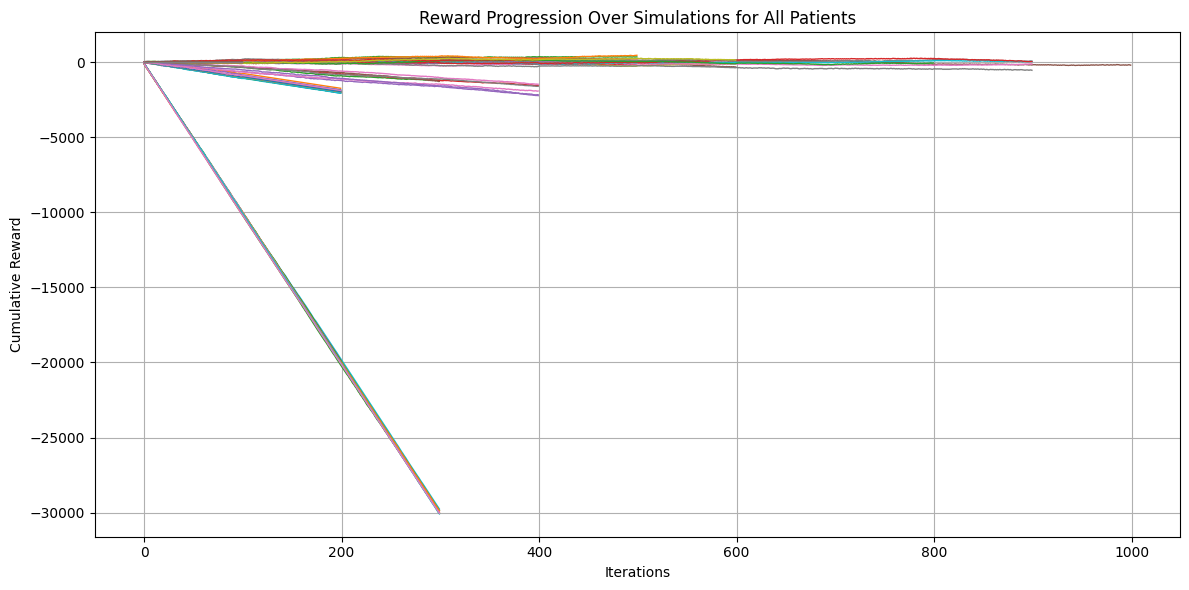

In [ ]:
import matplotlib.pyplot as plt

# Extract cumulative rewards for each patient
patient_ids = list(set([log['Patient ID'] for log in episode_logs_df]))
reward_progression = {patient_id: [] for patient_id in patient_ids}

for log in episode_logs_df:
    patient_id = log['Patient ID']
    if not reward_progression[patient_id]:  # If first iteration for patient, start cumulative sum
        reward_progression[patient_id].append(log['Reward'])
    else:
        reward_progression[patient_id].append(reward_progression[patient_id][-1] + log['Reward'])

# Plot cumulative rewards for all patients
plt.figure(figsize=(12, 6))
for patient_id, rewards in reward_progression.items():
    plt.plot(rewards, linewidth=1)  # Plot each patient's reward progression

# Add titles and labels
plt.title("Reward Progression Over Simulations for All Patients")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.tight_layout()

# Remove legend for a cleaner view
plt.legend().remove()
plt.show()


Q-Learning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'].replace('.', 0, inplace=True)
df['rtumor'].replace('.', 0, inplace=True)

# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions
model_size = RandomForestRegressor(random_state=42)
model_number = RandomForestRegressor(random_state=42)

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate

# Define all possible treatments for consistent feature encoding
all_treatments = ['placebo', 'pyridoxine', 'thiotepa']
treatment_dict = {t: i for i, t in enumerate(all_treatments)}

# Initialize Q-table (state-action table)
# The state space will be based on the number of tumors and tumor size, which will be discretized
state_space_size = 10  # You can adjust this for finer resolution
q_table = np.zeros((state_space_size, state_space_size, len(all_treatments)))

# Function to discretize the state space (for example, discretize tumor size and number of tumors)
def discretize_state(number_of_tumors, tumor_size):
    number_of_tumors_discretized = min(state_space_size - 1, max(0, number_of_tumors))
    tumor_size_discretized = min(state_space_size - 1, max(0, int(tumor_size // 10)))  # Discretize size
    return number_of_tumors_discretized, tumor_size_discretized

# Function to choose action based on epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < epsilon:
        # Exploration: Random action
        return np.random.choice(len(all_treatments))
    else:
        # Exploitation: Action with highest Q-value
        return np.argmax(q_table[state[0], state[1]])

# Function to predict treatment effects using the trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if f'treatment_{t}' not in input_data.columns:
            input_data[f'treatment_{t}'] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)


# Simulation function using the Q-learning model for each patient
def simulate_treatment(df, num_iterations=100):
    all_episode_logs = []
    overall_metrics = {'total_reward': 0, 'total_size_reduction': 0, 'total_tumor_reduction': 0, 'num_recurrences': 0}

    for i, patient in df.iterrows():
        # Initialize patient states
        number_of_tumors = patient['number']
        tumor_size = patient['size']
        start_time = patient['start']
        stop_time = patient['stop']
        recurrence = patient['recur']

        total_reward = 0

        # Run treatment simulation over multiple episodes
        for iteration in range(1, num_iterations + 1):
            # Discretize current state
            state = discretize_state(number_of_tumors, tumor_size)

            # Choose action (treatment) using Q-learning
            action = choose_action(state)

            # Predict the effects of the chosen treatment
            treatment = all_treatments[action]
            predicted_size, predicted_number = predict_treatment_effect(
                treatment=treatment,
                number_of_tumors=number_of_tumors,
                tumor_size=tumor_size,
                recurrence=recurrence,
                start=start_time,
                stop=stop_time
            )

            # Calculate reward
            tumor_size_change = tumor_size - predicted_size
            tumor_count_change = number_of_tumors - predicted_number
            reward = 0

            # Reward logic based on tumor size and count changes
            if tumor_size_change > 0:
                reward = 10
            elif tumor_size_change < 0:
                reward = -10

            if tumor_count_change > 0:
                reward += 10
            elif tumor_count_change < 0:
                reward -= 10

            # Special case for recurrence
            if recurrence == 1:
                reward -= 10
            elif recurrence == 2:
                reward -= 100
            elif recurrence == 3:
                reward -= 5

            # Update Q-table based on reward
            next_state = discretize_state(predicted_number, predicted_size)
            max_future_q = np.max(q_table[next_state[0], next_state[1]])
            current_q = q_table[state[0], state[1], action]
            q_table[state[0], state[1], action] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            total_reward += reward

            # Log the details
            all_episode_logs.append({
                'Patient ID': patient['id'],
                'Iteration': iteration,
                'Treatment': treatment,
                'Actual Tumor Size': tumor_size,
                'Predicted Tumor Size': predicted_size,
                'Actual Tumor Count': number_of_tumors,
                'Predicted Tumor Count': predicted_number,
                'Size Change': tumor_size_change,
                'Count Change': tumor_count_change,
                'Reward': reward
            })

            # Update patient states for the next iteration
            tumor_size = predicted_size
            number_of_tumors = predicted_number

        overall_metrics['total_reward'] += total_reward
        overall_metrics['total_size_reduction'] += tumor_size
        overall_metrics['total_tumor_reduction'] += number_of_tumors

    return pd.DataFrame(all_episode_logs), overall_metrics

# Run the simulation for 100 iterations
episode_logs_df, overall_metrics = simulate_treatment(df, num_iterations=100)

# Display overall summary
print("\nOverall Summary Metrics:")
print(f"Total Reward: {overall_metrics['total_reward']}")
print(f"Total Tumor Size Reduction: {overall_metrics['total_size_reduction']}")
print(f"Total Tumor Count Reduction: {overall_metrics['total_tumor_reduction']}")



Overall Summary Metrics:
Total Reward: -354770
Total Tumor Size Reduction: 162.45999999999992
Total Tumor Count Reduction: 451


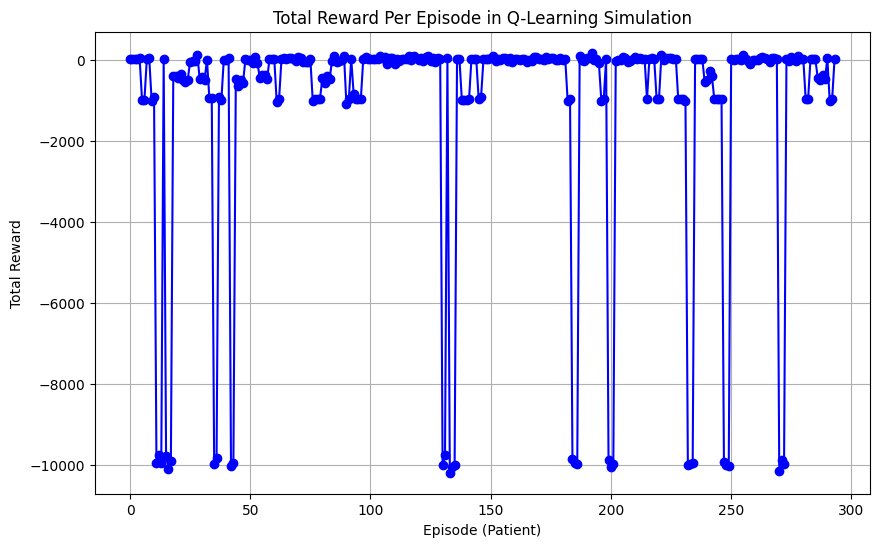

In [ ]:
import matplotlib.pyplot as plt

# Updated simulate_treatment function with reward tracking for plotting
def simulate_treatment(df, num_iterations=100):
    all_episode_logs = []
    rewards_per_episode = []  # Track total reward per episode
    overall_metrics = {'total_reward': 0, 'total_size_reduction': 0, 'total_tumor_reduction': 0}

    for i, patient in df.iterrows():
        number_of_tumors = patient['number']
        tumor_size = patient['size']
        start_time = patient['start']
        stop_time = patient['stop']
        recurrence = patient['recur']
        total_reward = 0

        # Track rewards for each episode (each iteration across patients)
        for iteration in range(1, num_iterations + 1):
            state = discretize_state(number_of_tumors, tumor_size)
            action = choose_action(state)
            treatment = all_treatments[action]

            # Predict effects of the chosen treatment
            predicted_size, predicted_number = predict_treatment_effect(
                treatment, number_of_tumors, tumor_size, recurrence, start_time, stop_time
            )

            # Calculate reward
            tumor_size_change = tumor_size - predicted_size
            tumor_count_change = number_of_tumors - predicted_number
            reward = 0

            if tumor_size_change > 0:
                reward = 10
            elif tumor_size_change < 0:
                reward = -10

            if tumor_count_change > 0:
                reward += 10
            elif tumor_count_change < 0:
                reward -= 10

            if recurrence == 1:
                reward -= 10
            elif recurrence == 2:
                reward -= 100
            elif recurrence == 3:
                reward -= 5

            # Update Q-table
            next_state = discretize_state(predicted_number, predicted_size)
            max_future_q = np.max(q_table[next_state[0], next_state[1]])
            current_q = q_table[state[0], state[1], action]
            q_table[state[0], state[1], action] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            total_reward += reward

            # Log details
            all_episode_logs.append({
                'Patient ID': patient['id'],
                'Iteration': iteration,
                'Treatment': treatment,
                'Actual Tumor Size': tumor_size,
                'Predicted Tumor Size': predicted_size,
                'Actual Tumor Count': number_of_tumors,
                'Predicted Tumor Count': predicted_number,
                'Size Change': tumor_size_change,
                'Count Change': tumor_count_change,
                'Reward': reward
            })

            tumor_size = predicted_size
            number_of_tumors = predicted_number

        # Add total reward for this episode (patient)
        rewards_per_episode.append(total_reward)
        overall_metrics['total_reward'] += total_reward
        overall_metrics['total_size_reduction'] += tumor_size
        overall_metrics['total_tumor_reduction'] += number_of_tumors

    return pd.DataFrame(all_episode_logs), overall_metrics, rewards_per_episode

# Run simulation and track rewards
episode_logs_df, overall_metrics, rewards_per_episode = simulate_treatment(df, num_iterations=100)

# Plotting cumulative reward per episode
plt.figure(figsize=(10, 6))
plt.plot(range(len(rewards_per_episode)), rewards_per_episode, color='blue', marker='o', linestyle='-', linewidth=1.5)
plt.xlabel('Episode (Patient)')
plt.ylabel('Total Reward')
plt.title('Total Reward Per Episode in Q-Learning Simulation')
plt.grid()
plt.show()


DQN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'] = df['rsize'].replace({'.': 0}).astype(float)
df['rtumor'] = df['rtumor'].replace({'.': 0}).astype(float)


# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Define all treatments for one-hot encoding purposes
all_treatments = df['treatment'].unique().tolist()

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions
model_size = RandomForestRegressor(random_state=42)
model_number = RandomForestRegressor(random_state=42)

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Model evaluation metrics for predictive accuracy
y_size_pred = model_size.predict(X_test)
y_number_pred = model_number.predict(X_test)

print(f"Tumor Size Prediction - MSE: {mean_squared_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - MAE: {mean_absolute_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - R2 Score: {r2_score(y_size_test, y_size_pred):.2f}\n")

print(f"Tumor Count Prediction - MSE: {mean_squared_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - MAE: {mean_absolute_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - R2 Score: {r2_score(y_number_test, y_number_pred):.2f}")

# Define the Q-Network for DQN
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Hyperparameters
input_dim = len(X.columns)  # Number of input features (state space size)
output_dim = len(all_treatments)  # Number of possible treatments (action space size)
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate (epsilon-greedy strategy)
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
batch_size = 32  # Size of each experience batch
lr = 0.001  # Learning rate for the optimizer
replay_buffer_size = 10000  # Size of the replay buffer
target_update_freq = 10  # How often to update the target network
num_episodes = 100  # Number of episodes to train on

# Initialize networks and optimizer
q_network = QNetwork(input_dim, output_dim)
target_network = QNetwork(input_dim, output_dim)
target_network.load_state_dict(q_network.state_dict())  # Copy weights to target network
optimizer = optim.Adam(q_network.parameters(), lr=lr)

# Initialize replay buffer
replay_buffer = deque(maxlen=replay_buffer_size)

# Function to predict treatment effects using trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if f'treatment_{t}' not in input_data.columns:
            input_data[f'treatment_{t}'] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)

# Experience Replay Sampling
def sample_experiences(batch_size):
    indices = np.random.choice(len(replay_buffer), batch_size, replace=False)
    batch = [replay_buffer[idx] for idx in indices]
    states, actions, rewards, next_states, done = zip(*batch)

    # Convert lists of arrays into numpy arrays and ensure correct shape for tensor conversion
    states = np.stack(states)  # Stack to ensure consistent shape
    next_states = np.stack(next_states)

    # Convert to PyTorch tensors
    return (
        torch.tensor(states, dtype=torch.float32),
        torch.tensor(actions),
        torch.tensor(rewards, dtype=torch.float32),
        torch.tensor(next_states, dtype=torch.float32),
        torch.tensor(done, dtype=torch.float32),
    )


# Add these imports at the beginning of your script
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_dqn():
    global epsilon
    cumulative_size_reduction = 0
    cumulative_tumor_reduction = 0
    cumulative_reward = 0  # Add this line to initialize cumulative_reward

    all_actual_sizes, all_predicted_sizes = [], []
    all_actual_counts, all_predicted_counts = [], []

    for episode in range(num_episodes):
        episode_total_reward = 0
        episode_total_size_reduction = 0
        episode_total_tumor_reduction = 0

        for i, patient in df.iterrows():
            number_of_tumors = patient['number']
            tumor_size = patient['size']
            start_time = patient['start']
            stop_time = patient['stop']
            recurrence = patient['recur']

            state_values = patient[['number', 'size', 'recur', 'start', 'stop']].values.astype(np.float32)
            state = torch.tensor(np.concatenate([state_values, np.zeros(len(all_treatments))]), dtype=torch.float32)

            done = False
            while not done:
                if np.random.rand() <= epsilon:
                    action = np.random.choice(output_dim)
                else:
                    q_values = q_network(state)
                    action = torch.argmax(q_values).item()

                treatment = all_treatments[action]
                predicted_size, predicted_number = predict_treatment_effect(
                    treatment=treatment,
                    number_of_tumors=number_of_tumors,
                    tumor_size=tumor_size,
                    recurrence=recurrence,
                    start=start_time,
                    stop=stop_time
                )

                all_actual_sizes.append(tumor_size)
                all_predicted_sizes.append(predicted_size)
                all_actual_counts.append(number_of_tumors)
                all_predicted_counts.append(predicted_number)

                tumor_size_change = tumor_size - predicted_size
                tumor_count_change = number_of_tumors - predicted_number
                reward = tumor_size_change + tumor_count_change

                next_state_values = patient[['number', 'size', 'recur', 'start', 'stop']].values.astype(np.float32)
                next_state = np.concatenate([next_state_values, np.zeros(len(all_treatments))])
                done = True
                replay_buffer.append((state, action, reward, next_state, done))

                state = next_state

                episode_total_reward += reward
                episode_total_size_reduction += tumor_size_change
                episode_total_tumor_reduction += tumor_count_change

                if len(replay_buffer) >= batch_size:
                    states_batch, actions_batch, rewards_batch, next_states_batch, done_batch = sample_experiences(batch_size)
                    q_values = q_network(states_batch)
                    next_q_values = target_network(next_states_batch)
                    max_next_q_values = next_q_values.max(dim=1)[0]

                    target = rewards_batch + gamma * max_next_q_values * (1 - done_batch)

                    predicted_q_values = q_values.gather(1, actions_batch.unsqueeze(1))
                    loss = nn.MSELoss()(predicted_q_values.squeeze(), target)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

        if episode % target_update_freq == 0:
            target_network.load_state_dict(q_network.state_dict())

        cumulative_size_reduction += episode_total_size_reduction
        cumulative_tumor_reduction += episode_total_tumor_reduction
        cumulative_reward += episode_total_reward  # Now this won't throw an error

        mse_size = mean_squared_error(all_actual_sizes, all_predicted_sizes)
        mae_size = mean_absolute_error(all_actual_sizes, all_predicted_sizes)
        r2_size = r2_score(all_actual_sizes, all_predicted_sizes)

        mse_count = mean_squared_error(all_actual_counts, all_predicted_counts)
        mae_count = mean_absolute_error(all_actual_counts, all_predicted_counts)
        r2_count = r2_score(all_actual_counts, all_predicted_counts)

        print(f"Episode {episode+1}/{num_episodes}, Total Reward: {episode_total_reward}")
        print(f"Total Tumor Size Reduction: {episode_total_size_reduction}")
        print(f"Total Tumor Count Reduction: {episode_total_tumor_reduction}")

        print(f"Tumor Size Prediction - MSE: {mse_size:.2f}, MAE: {mae_size:.2f}, R2 Score: {r2_size:.2f}")
        print(f"Tumor Count Prediction - MSE: {mse_count:.2f}, MAE: {mae_count:.2f}, R2 Score: {r2_count:.2f}")

    print(f"Cumulative Tumor Size Reduction: {cumulative_size_reduction}")
    print(f"Cumulative Tumor Count Reduction: {cumulative_tumor_reduction}")
    print(f"Cumulative Reward: {cumulative_reward}")
    return q_network




# Run DQN training
trained_q_network = train_dqn()


Tumor Size Prediction - MSE: 0.75
Tumor Size Prediction - MAE: 0.47
Tumor Size Prediction - R2 Score: -0.25

Tumor Count Prediction - MSE: 5.06
Tumor Count Prediction - MAE: 1.66
Tumor Count Prediction - R2 Score: -0.42
Episode 1/100, Total Reward: 605.9700000000003
Total Tumor Size Reduction: 412.97
Total Tumor Count Reduction: 193
Tumor Size Prediction - MSE: 4.29, MAE: 1.47, R2 Score: -0.82
Tumor Count Prediction - MSE: 4.98, MAE: 1.70, R2 Score: -0.55
Episode 2/100, Total Reward: 588.4100000000004
Total Tumor Size Reduction: 414.41
Total Tumor Count Reduction: 174
Tumor Size Prediction - MSE: 4.30, MAE: 1.48, R2 Score: -0.82
Tumor Count Prediction - MSE: 4.92, MAE: 1.68, R2 Score: -0.54
Episode 3/100, Total Reward: 631.8800000000002
Total Tumor Size Reduction: 414.8800000000002
Total Tumor Count Reduction: 217
Tumor Size Prediction - MSE: 4.30, MAE: 1.48, R2 Score: -0.82
Tumor Count Prediction - MSE: 4.89, MAE: 1.68, R2 Score: -0.52
Episode 4/100, Total Reward: 609.71
Total Tumor S

Episode 1/100, Total Reward: 694.0700000000002
Total Tumor Size Reduction: 416.0700000000002
Total Tumor Count Reduction: 278
Tumor Size Prediction - MSE: 4.30, MAE: 1.48, R2 Score: -0.82
Tumor Count Prediction - MSE: 4.76, MAE: 1.61, R2 Score: -0.48
Episode 2/100, Total Reward: 680.4500000000004
Total Tumor Size Reduction: 413.45000000000016
Total Tumor Count Reduction: 267
Tumor Size Prediction - MSE: 4.31, MAE: 1.48, R2 Score: -0.83
Tumor Count Prediction - MSE: 4.74, MAE: 1.61, R2 Score: -0.48
Episode 3/100, Total Reward: 643.7000000000003
Total Tumor Size Reduction: 415.70000000000033
Total Tumor Count Reduction: 228
Tumor Size Prediction - MSE: 4.31, MAE: 1.48, R2 Score: -0.83
Tumor Count Prediction - MSE: 4.66, MAE: 1.60, R2 Score: -0.45
Episode 4/100, Total Reward: 668.2000000000004
Total Tumor Size Reduction: 415.2000000000003
Total Tumor Count Reduction: 253
Tumor Size Prediction - MSE: 4.31, MAE: 1.48, R2 Score: -0.83
Tumor Count Prediction - MSE: 4.74, MAE: 1.61, R2 Score: 

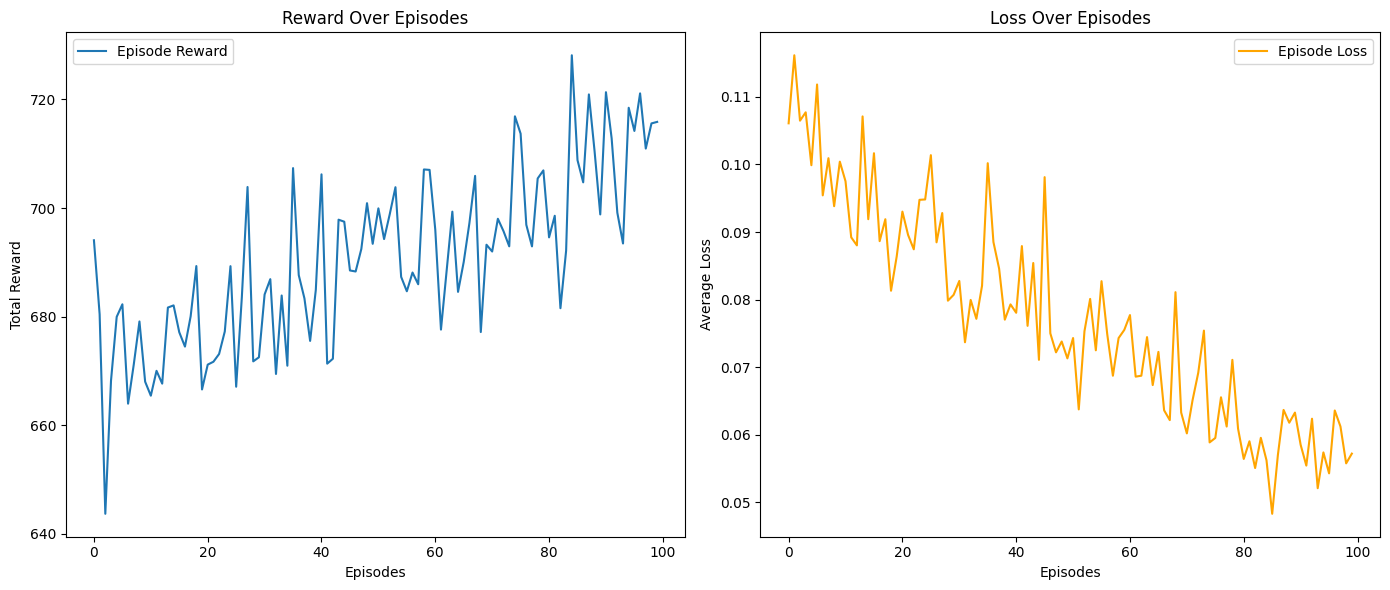

In [ ]:
import matplotlib.pyplot as plt

# Lists to track rewards and losses over episodes
reward_history = []
loss_history = []

# Modify train_dqn to track rewards and losses
def train_dqn_with_tracking():
    global epsilon
    cumulative_size_reduction = 0
    cumulative_tumor_reduction = 0
    cumulative_reward = 0

    all_actual_sizes, all_predicted_sizes = [], []
    all_actual_counts, all_predicted_counts = [], []

    for episode in range(num_episodes):
        episode_total_reward = 0
        episode_total_size_reduction = 0
        episode_total_tumor_reduction = 0
        episode_loss = 0  # To track total loss per episode
        loss_count = 0    # Count batches where loss was calculated

        for i, patient in df.iterrows():
            number_of_tumors = patient['number']
            tumor_size = patient['size']
            start_time = patient['start']
            stop_time = patient['stop']
            recurrence = patient['recur']

            state_values = patient[['number', 'size', 'recur', 'start', 'stop']].values.astype(np.float32)
            state = torch.tensor(np.concatenate([state_values, np.zeros(len(all_treatments))]), dtype=torch.float32)

            done = False
            while not done:
                if np.random.rand() <= epsilon:
                    action = np.random.choice(output_dim)
                else:
                    q_values = q_network(state)
                    action = torch.argmax(q_values).item()

                treatment = all_treatments[action]
                predicted_size, predicted_number = predict_treatment_effect(
                    treatment=treatment,
                    number_of_tumors=number_of_tumors,
                    tumor_size=tumor_size,
                    recurrence=recurrence,
                    start=start_time,
                    stop=stop_time
                )

                all_actual_sizes.append(tumor_size)
                all_predicted_sizes.append(predicted_size)
                all_actual_counts.append(number_of_tumors)
                all_predicted_counts.append(predicted_number)

                tumor_size_change = tumor_size - predicted_size
                tumor_count_change = number_of_tumors - predicted_number
                reward = tumor_size_change + tumor_count_change

                next_state_values = patient[['number', 'size', 'recur', 'start', 'stop']].values.astype(np.float32)
                next_state = np.concatenate([next_state_values, np.zeros(len(all_treatments))])
                done = True
                replay_buffer.append((state, action, reward, next_state, done))

                state = next_state

                episode_total_reward += reward
                episode_total_size_reduction += tumor_size_change
                episode_total_tumor_reduction += tumor_count_change

                if len(replay_buffer) >= batch_size:
                    states_batch, actions_batch, rewards_batch, next_states_batch, done_batch = sample_experiences(batch_size)
                    q_values = q_network(states_batch)
                    next_q_values = target_network(next_states_batch)
                    max_next_q_values = next_q_values.max(dim=1)[0]

                    target = rewards_batch + gamma * max_next_q_values * (1 - done_batch)

                    predicted_q_values = q_values.gather(1, actions_batch.unsqueeze(1))
                    loss = nn.MSELoss()(predicted_q_values.squeeze(), target)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    episode_loss += loss.item()
                    loss_count += 1

        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

        if episode % target_update_freq == 0:
            target_network.load_state_dict(q_network.state_dict())

        cumulative_size_reduction += episode_total_size_reduction
        cumulative_tumor_reduction += episode_total_tumor_reduction
        cumulative_reward += episode_total_reward

        # Append episode reward and average loss to history
        reward_history.append(episode_total_reward)
        loss_history.append(episode_loss / loss_count if loss_count > 0 else 0)

        mse_size = mean_squared_error(all_actual_sizes, all_predicted_sizes)
        mae_size = mean_absolute_error(all_actual_sizes, all_predicted_sizes)
        r2_size = r2_score(all_actual_sizes, all_predicted_sizes)

        mse_count = mean_squared_error(all_actual_counts, all_predicted_counts)
        mae_count = mean_absolute_error(all_actual_counts, all_predicted_counts)
        r2_count = r2_score(all_actual_counts, all_predicted_counts)

        print(f"Episode {episode+1}/{num_episodes}, Total Reward: {episode_total_reward}")
        print(f"Total Tumor Size Reduction: {episode_total_size_reduction}")
        print(f"Total Tumor Count Reduction: {episode_total_tumor_reduction}")
        print(f"Tumor Size Prediction - MSE: {mse_size:.2f}, MAE: {mae_size:.2f}, R2 Score: {r2_size:.2f}")
        print(f"Tumor Count Prediction - MSE: {mse_count:.2f}, MAE: {mae_count:.2f}, R2 Score: {r2_count:.2f}")

    print(f"Cumulative Tumor Size Reduction: {cumulative_size_reduction}")
    print(f"Cumulative Tumor Count Reduction: {cumulative_tumor_reduction}")
    print(f"Cumulative Reward: {cumulative_reward}")
    return q_network

# Train the network
trained_q_network = train_dqn_with_tracking()

# Plot rewards and losses
plt.figure(figsize=(14, 6))

# Plot reward history
plt.subplot(1, 2, 1)
plt.plot(reward_history, label="Episode Reward")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reward Over Episodes")
plt.legend()

# Plot loss history
plt.subplot(1, 2, 2)
plt.plot(loss_history, label="Episode Loss", color='orange')
plt.xlabel("Episodes")
plt.ylabel("Average Loss")
plt.title("Loss Over Episodes")
plt.legend()

plt.tight_layout()
plt.show()


Quantum Part

QML Predictive Models Comparison

In [ ]:
!pip install pennylane scikit-learn numpy pandas


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pennylane as qml
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Data preprocessing
df['rsize'].replace('.', 0, inplace=True)
df['rtumor'].replace('.', 0, inplace=True)
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# One-hot encoding for treatment
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X_scaled, y_size, y_number, test_size=0.2, random_state=42
)

# Model Evaluation Function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Define Quantum Linear Regression
def quantum_linear_regression(X_train, y_train, X_test):
    n_features = X_train.shape[1]
    weights = np.random.randn(n_features)
    dev_qlinear = qml.device("default.qubit", wires=n_features)

    @qml.qnode(dev_qlinear)
    def quantum_linear_circuit(features, weights):
        for i in range(len(features)):
            qml.RX(features[i], wires=i)
        for i in range(len(features)):
            qml.RZ(weights[i], wires=i)
        return [qml.expval(qml.PauliZ(i)) for i in range(len(features))]

    learning_rate = 0.1
    for epoch in range(100):
        for i in range(len(X_train)):
            features = X_train[i]
            target = y_train.iloc[i]
            predictions = quantum_linear_circuit(features, weights)
            loss = np.mean((np.array(predictions) - target) ** 2)
            weights -= learning_rate * (2 * (predictions - target)) * features

    y_pred = [np.mean(quantum_linear_circuit(features, weights)) for features in X_test]
    return np.array(y_pred)

# Quantum Linear Regression Prediction for Tumor Size (y_size)
y_size_pred_qlinear = quantum_linear_regression(X_train, y_size_train, X_test)
mae_qlinear_size, mse_qlinear_size, r2_qlinear_size = evaluate_model(y_size_test, y_size_pred_qlinear)

# Quantum Linear Regression Prediction for Tumor Count (y_number)
y_number_pred_qlinear = quantum_linear_regression(X_train, y_number_train, X_test)
mae_qlinear_number, mse_qlinear_number, r2_qlinear_number = evaluate_model(y_number_test, y_number_pred_qlinear)

# Classical Model: Linear Regression for Tumor Size
lin_reg_size = LinearRegression()
lin_reg_size.fit(X_train, y_size_train)
y_size_pred_linreg = lin_reg_size.predict(X_test)
mae_linreg_size, mse_linreg_size, r2_linreg_size = evaluate_model(y_size_test, y_size_pred_linreg)

# Classical Model: Linear Regression for Tumor Count
lin_reg_number = LinearRegression()
lin_reg_number.fit(X_train, y_number_train)
y_number_pred_linreg = lin_reg_number.predict(X_test)
mae_linreg_number, mse_linreg_number, r2_linreg_number = evaluate_model(y_number_test, y_number_pred_linreg)

# Print results
print("Quantum Linear Regression Metrics (Tumor Size):")
print(f"MAE: {mae_qlinear_size}, MSE: {mse_qlinear_size}, R2: {r2_qlinear_size}")

print("\nQuantum Linear Regression Metrics (Tumor Count):")
print(f"MAE: {mae_qlinear_number}, MSE: {mse_qlinear_number}, R2: {r2_qlinear_number}")

print("\nClassical Linear Regression Metrics (Tumor Size):")
print(f"MAE: {mae_linreg_size}, MSE: {mse_linreg_size}, R2: {r2_linreg_size}")

print("\nClassical Linear Regression Metrics (Tumor Count):")
print(f"MAE: {mae_linreg_number}, MSE: {mse_linreg_number}, R2: {r2_linreg_number}")


<ipython-input-6-eceb74d5f27e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rsize'].replace('.', 0, inplace=True)
<ipython-input-6-eceb74d5f27e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

Quantum Linear Regression Metrics (Tumor Size):
MAE: 0.5826131890250329, MSE: 0.5769995393933318, R2: 0.04172929550181814

Quantum Linear Regression Metrics (Tumor Count):
MAE: 1.2618853354444761, MSE: 4.370234202363495, R2: -0.22348280991051328

Classical Linear Regression Metrics (Tumor Size):
MAE: 0.445753489741806, MSE: 0.4584592836861587, R2: 0.23859887093916077

Classical Linear Regression Metrics (Tumor Count):
MAE: 1.6481077244607707, MSE: 4.613474914436213, R2: -0.2915800367663226


QRL

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pennylane as qml

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/bladder1.csv")

# Replace '.' with 0 in the `rsize` and `rtumor` columns
df['rsize'] = df['rsize'].replace({'.': 0}).astype(float)
df['rtumor'] = df['rtumor'].replace({'.': 0}).astype(float)

# Convert rsize and rtumor to numeric type after replacing dots with zeros
df['rsize'] = pd.to_numeric(df['rsize'])
df['rtumor'] = pd.to_numeric(df['rtumor'])

# Make sure treatment values are lowercase for consistency
df['treatment'] = df['treatment'].str.lower()

# Prepare features and target variables
X = df[['treatment', 'number', 'size', 'recur', 'start', 'stop']]
y_size = df['rsize']  # Target for tumor size change
y_number = df['rtumor']  # Target for tumor count change

# Encode categorical treatment variable without dropping any columns
X = pd.get_dummies(X, columns=['treatment'], drop_first=False)

# Save the exact column order for later prediction
column_order = X.columns

# Define all treatments for one-hot encoding purposes
all_treatments = df['treatment'].unique().tolist()

# Train-test split
X_train, X_test, y_size_train, y_size_test, y_number_train, y_number_test = train_test_split(
    X, y_size, y_number, test_size=0.2, random_state=42
)

# Train separate models for size and number predictions
model_size = RandomForestRegressor(random_state=42)
model_number = RandomForestRegressor(random_state=42)

model_size.fit(X_train, y_size_train)
model_number.fit(X_train, y_number_train)

# Model evaluation metrics for predictive accuracy
y_size_pred = model_size.predict(X_test)
y_number_pred = model_number.predict(X_test)

print(f"Tumor Size Prediction - MSE: {mean_squared_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - MAE: {mean_absolute_error(y_size_test, y_size_pred):.2f}")
print(f"Tumor Size Prediction - R2 Score: {r2_score(y_size_test, y_size_pred):.2f}\n")

print(f"Tumor Count Prediction - MSE: {mean_squared_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - MAE: {mean_absolute_error(y_number_test, y_number_pred):.2f}")
print(f"Tumor Count Prediction - R2 Score: {r2_score(y_number_test, y_number_pred):.2f}")

# Define the Quantum Circuit (QNN)
num_qubits = 6  # Number of input features (treatments and other features)
dev = qml.device('default.qubit', wires=num_qubits)

# Define the quantum circuit (QNN) for QRL
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Apply RX gates for each feature
    for i in range(num_qubits):
        qml.RX(inputs[i], wires=i)
        qml.RY(weights[i], wires=i)  # Apply RY gates with weights

    # Apply entangling CNOT gates between qubits
    for i in range(num_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

    # Measure the first qubit to get the output (Q-value)
    return qml.expval(qml.PauliZ(0))

# Define the Q-network class (Quantum version)
class QuantumQNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QuantumQNetwork, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weights = nn.Parameter(torch.randn(input_dim))  # Quantum weights

    def forward(self, state):
        # Convert state to input array for quantum circuit
        state = state.numpy()
        # Call the quantum circuit
        q_value = quantum_circuit(state, self.weights)
        return q_value

# Hyperparameters for QRL
input_dim = len(X.columns)  # Number of input features (state space size)
output_dim = len(all_treatments)  # Number of possible treatments (action space size)
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate (epsilon-greedy strategy)
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
batch_size = 32  # Size of each experience batch
lr = 0.001  # Learning rate for the optimizer
replay_buffer_size = 10000  # Size of the replay buffer
target_update_freq = 10  # How often to update the target network
num_episodes = 100  # Number of episodes to train on

# Initialize networks and optimizer
q_network = QuantumQNetwork(input_dim, output_dim)
target_network = QuantumQNetwork(input_dim, output_dim)
target_network.load_state_dict(q_network.state_dict())  # Copy weights to target network
optimizer = optim.Adam(q_network.parameters(), lr=lr)

# Initialize replay buffer
replay_buffer = deque(maxlen=replay_buffer_size)

# Experience Replay Sampling
def sample_experiences(batch_size):
    indices = np.random.choice(len(replay_buffer), batch_size, replace=False)
    batch = [replay_buffer[idx] for idx in indices]
    states, actions, rewards, next_states, done = zip(*batch)

    # Convert lists of arrays into numpy arrays and ensure correct shape for tensor conversion
    states = np.stack(states)  # Stack to ensure consistent shape
    next_states = np.stack(next_states)

    # Convert to PyTorch tensors
    return (
        torch.tensor(states, dtype=torch.float32),
        torch.tensor(actions),
        torch.tensor(rewards, dtype=torch.float32),
        torch.tensor(next_states, dtype=torch.float32),
        torch.tensor(done, dtype=torch.float32),
    )

# Function to predict treatment effects using trained models
def predict_treatment_effect(treatment, number_of_tumors, tumor_size, recurrence, start, stop):
    # Prepare input data for prediction, ensuring lowercase treatment name
    treatment = treatment.lower()
    input_data = pd.DataFrame({
        'number': [number_of_tumors],
        'size': [tumor_size],
        'recur': [recurrence],
        'start': [start],
        'stop': [stop],
        **{f'treatment_{treatment}': [1]}  # One-hot encoding treatment
    })

    # Ensure all treatment columns are present in the input data
    for t in all_treatments:
        if f'treatment_{t}' not in input_data.columns:
            input_data[f'treatment_{t}'] = 0  # Fill missing columns with 0

    # Reorder columns to match the training data
    input_data = input_data[column_order]

    # Predict new tumor size and number using trained models
    predicted_size = model_size.predict(input_data)[0]
    predicted_number = model_number.predict(input_data)[0]

    return predicted_size, int(predicted_number)

# Train QRL (Quantum Reinforcement Learning)
def train_qdqn():
    global epsilon
    cumulative_size_reduction = 0
    cumulative_tumor_reduction = 0
    cumulative_reward = 0

    all_actual_sizes, all_predicted_sizes = [], []
    all_actual_counts, all_predicted_counts = [], []

    for episode in range(num_episodes):
        episode_total_reward = 0
        episode_total_size_reduction = 0
        episode_total_tumor_reduction = 0

        for i, patient in df.iterrows():
            number_of_tumors = patient['number']
            tumor_size = patient['size']
            start_time = patient['start']
            stop_time = patient['stop']
            recurrence = patient['recur']

            state_values = patient[['number', 'size', 'recur', 'start', 'stop']].values.astype(np.float32)
            state = torch.tensor(np.concatenate([state_values, np.zeros(len(all_treatments))]), dtype=torch.float32)

            done = False
            while not done:
                if np.random.rand() <= epsilon:
                    action = np.random.choice(output_dim)
                else:
                    q_values = q_network(state)
                    action = torch.argmax(q_values).item()

                treatment = all_treatments[action]
                predicted_size, predicted_number = predict_treatment_effect(
                    treatment=treatment,
                    number_of_tumors=number_of_tumors,
                    tumor_size=tumor_size,
                    recurrence=recurrence,
                    start=start_time,
                    stop=stop_time,
                )

                # Calculate reward and state transition
                reward = tumor_size - predicted_size  # Reward as tumor size reduction
                next_state_values = np.array([number_of_tumors, predicted_size, recurrence, start_time, stop_time])
                next_state = torch.tensor(np.concatenate([next_state_values, np.zeros(len(all_treatments))]), dtype=torch.float32)

                replay_buffer.append((state, action, reward, next_state, done))
                episode_total_reward += reward
                episode_total_size_reduction += reward
                episode_total_tumor_reduction += predicted_number

                state = next_state
                if len(replay_buffer) > batch_size:
                    states, actions, rewards, next_states, done_flags = sample_experiences(batch_size)

                    # Update Q-network using Bellman equation
                    q_values = q_network(states)
                    next_q_values = target_network(next_states)

                    target = rewards + (gamma * torch.max(next_q_values, dim=1)[0] * (1 - done_flags))
                    loss = torch.mean((q_values.gather(1, actions.unsqueeze(1)) - target.unsqueeze(1)) ** 2)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

        # Update epsilon and target network weights
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        if episode % target_update_freq == 0:
            target_network.load_state_dict(q_network.state_dict())

        # Print episode stats
        print(f"Episode {episode+1}/{num_episodes} - Total Reward: {episode_total_reward:.2f}")

train_qdqn()


Tumor Size Prediction - MSE: 0.75
Tumor Size Prediction - MAE: 0.47
Tumor Size Prediction - R2 Score: -0.25

Tumor Count Prediction - MSE: 5.06
Tumor Count Prediction - MAE: 1.66
Tumor Count Prediction - R2 Score: -0.42


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)